# Analyzing Duplicates

This is a streamlined version of duplicates-dev.ipynb that is more paper ready.



In [2]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import median_abs_deviation as MAD
%matplotlib inline

number of galaxies observed in halpha =  868
number after removing bad flag =  834
number of duplicate observations = 178


/Users/rfinn/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


<Figure size 720x720 with 0 Axes>

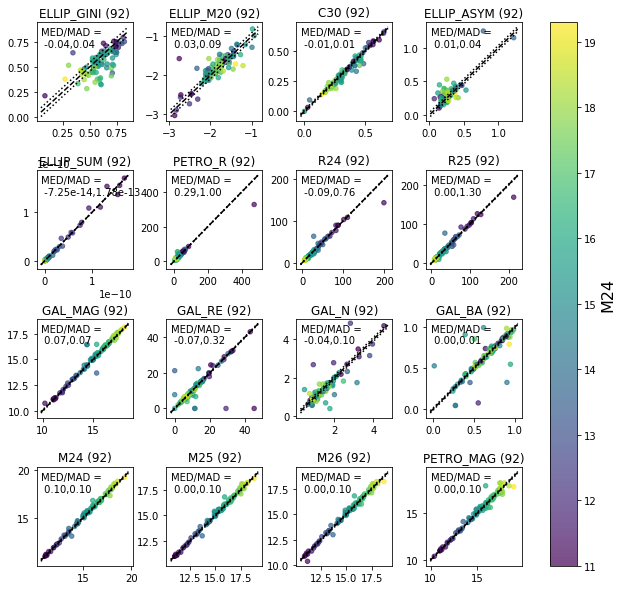

In [3]:
%matplotlib inline
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams()
plt.show()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


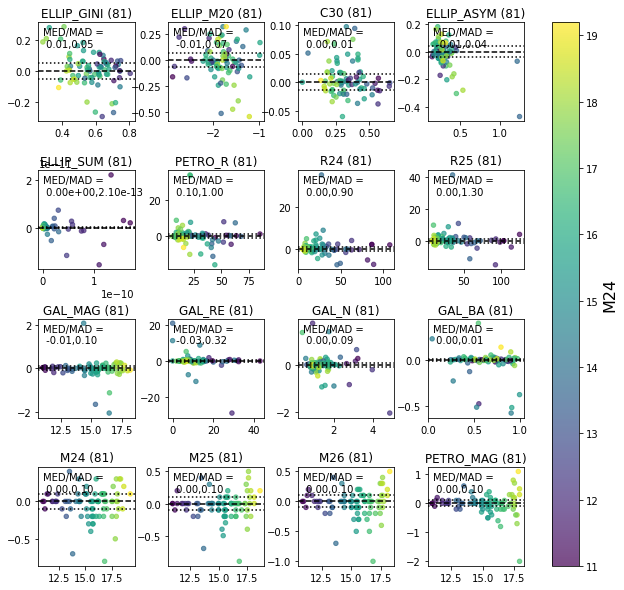

In [58]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rparams_residuals()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

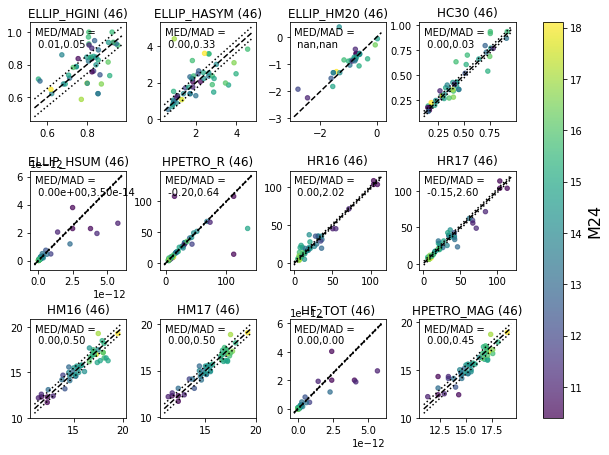

In [87]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


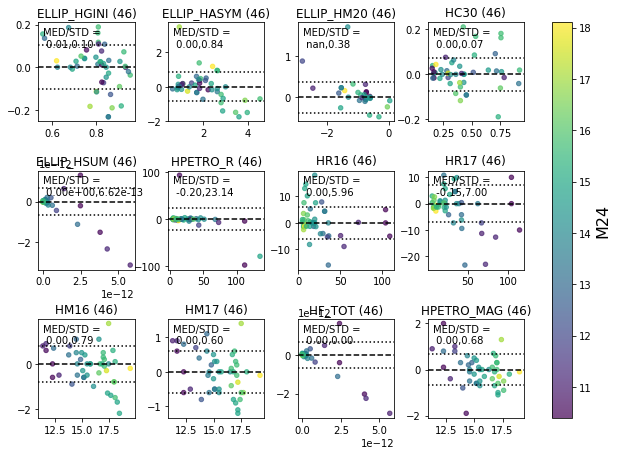

In [91]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hparams_residuals()

# Compare STATMORPH Params

### R-band Results

number of galaxies observed in halpha =  868
number after removing bad flag =  834
number of duplicate observations = 178


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

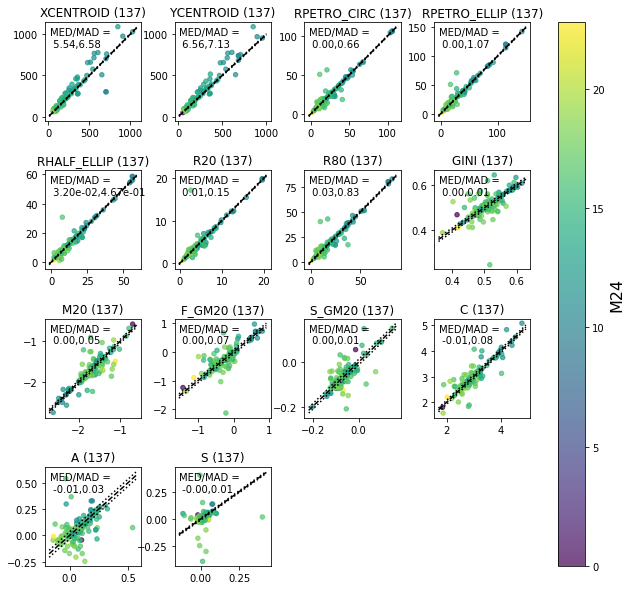

In [12]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rstatmorph()

### Halpha Results

number of galaxies observed in halpha =  868
number after removing bad flag =  834
number of duplicate observations = 178


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

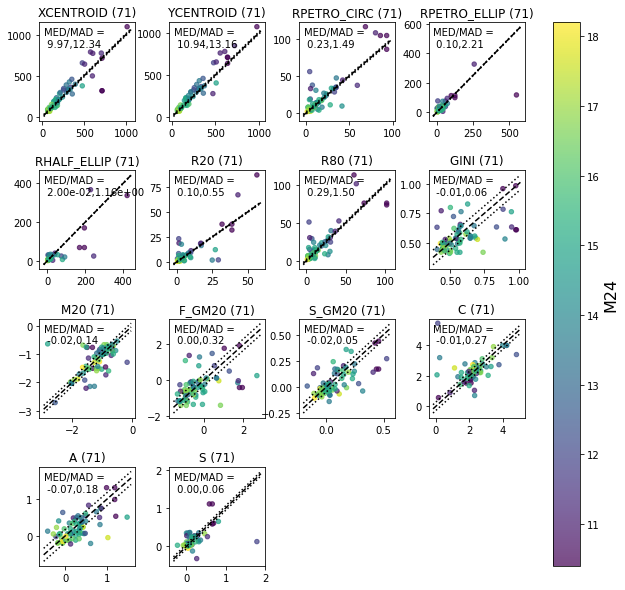

In [20]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph()

# TODOs

* why is M24, M25, M26 rounded to 0.1 mag?
* make seperate flags for galfit, sizes, mags, statmorph

In [24]:
4.14*(630+238)/60


59.89199999999999

In [23]:
2516/60


41.93333333333333

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

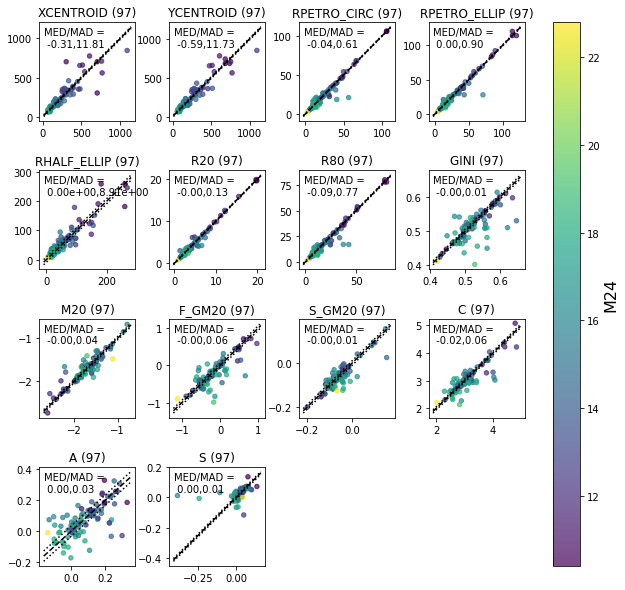

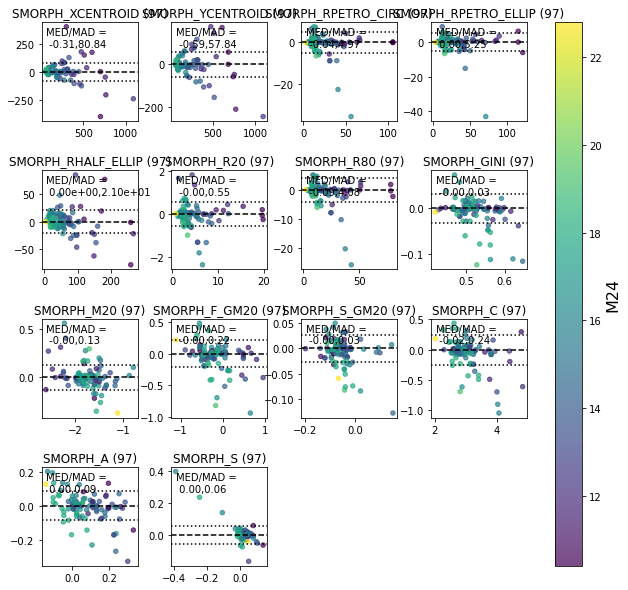

In [86]:
%run ~/github/havirgo/python/duplicates.py
d.plot_rstatmorph()

number of galaxies observed in halpha =  868
number after removing bad flag =  774
number of duplicate observations = 153


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

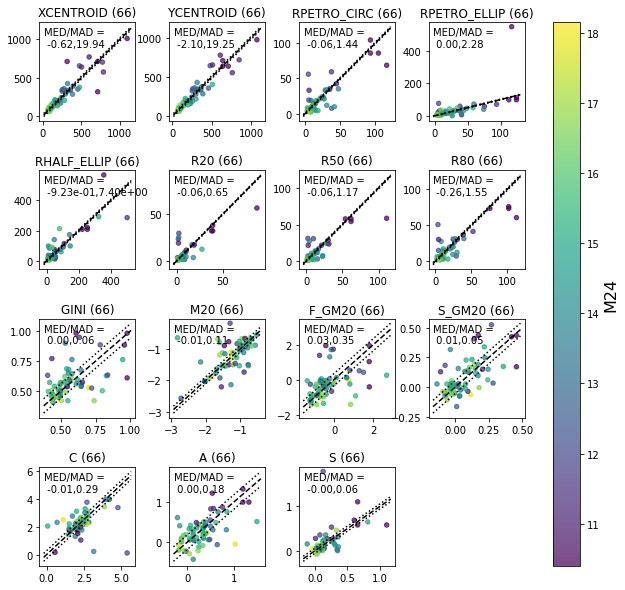

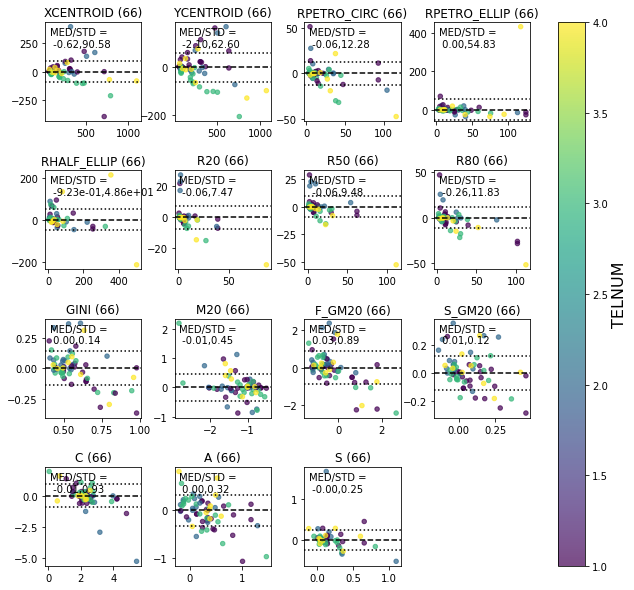

In [98]:
%run ~/github/havirgo/python/duplicates.py
d.plot_hstatmorph()


In [100]:
hflag = (d.htab['SMORPH_HFLAG'] < 2)& (d.htab['SMORPH_HXCENTROID'] >1)
print(f"number with good halpha statmorph = {np.sum(hflag)}")

rflag = (d.htab['SMORPH_FLAG'] < 2) & (d.htab['SMORPH_XCENTROID'] >1)
print(f"number with good rband statmorph = {np.sum(rflag)}")


print(f"number with good halpha AND rband statmorph = {np.sum(hflag & rflag)}")

number with good halpha statmorph = 320
number with good rband statmorph = 597
number with good halpha AND rband statmorph = 297


In [67]:
oddflag = hflag & ~rflag


In [71]:
d.htab['VFID','TEL'][oddflag]

VFID,TEL
bytes8,bytes3
VFID1793,BOK
VFID1807,BOK
VFID1807,BOK
VFID1957,BOK
VFID2144,HDI
VFID2165,BOK
VFID2591,BOK
VFID2615,INT
VFID2670,INT


In [72]:
d.htab['VFID','TEL'][hflag & rflag]

VFID,TEL
bytes8,bytes3
VFID0377,BOK
VFID0422,BOK
VFID0469,BOK
VFID0474,BOK
VFID0487,BOK
VFID0531,BOK
VFID0568,BOK
VFID0569,INT
VFID0569,BOK


In [73]:
i = d.htab['VFID'] == 'VFID0473'
d.htab['SMORPH_FLAG','SMORPH_HFLAG'][i]

SMORPH_FLAG,SMORPH_HFLAG
int32,int32
0,2
0,2
